# CMPT 423/820
## Assignment 4 Question 3
* Solutions and Grading Guide
* 12 marks

First some libraries...

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Step 1
The ```a4q3.csv``` file is a copy of one of the data files we used earlier in the term.  It has 4 columns: ```index, x, y, L```, where ```L``` represents a label.  The ```x, y``` are continuous quantities, good for plotting in 2D.  We will only use ```L``` to colourize our figures.

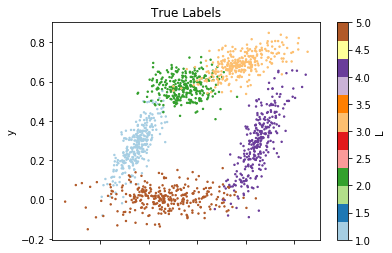

In [2]:
df = pd.read_csv('a4q3.csv', index_col=0)

# Plot the data with each label 'L' getting a different color

#Here we can choose a global colormap, to help visualization
# see https://matplotlib.org/tutorials/colors/colormaps.html
cmapstr = 'Paired'

# here we choose how big each point in the plot will be
ptsize = 2

df.plot.scatter(x='x', y='y',c='L',colormap=cmapstr,s=ptsize, title='True Labels')
plt.show()

## Step 2
Now we'll strip off the labels, and set up some variables for use by the fitting methods.

In [3]:
# just the input features
X_df = df[['x', 'y']]

# just the labels.
L_df = df['L']

# the number of true classes in the data
n_classes = len(np.unique(L_df))

# the number of clusters to seek; experiment with this!
n_components = n_classes

# Step 3
Fit the KMeans model to the features of the data set.

## Step 3 --- Solution
The KMeans object lets us select several options.  The most important is the first.
1. ```n_clusters```: This is the K in KMeans.  We have to choose how many clusters to look for.  
  * In our situation, we already know there are 5 labels, so choosing ```n_clusters=5``` is natural.  When the number of clusters is known in advance that's a good choice.  The cell above uses the data to count how many classes there are.
  * In some situations, especially if the number of dimensions is high, we might not be able to tell how many clusters we want.  We still have to choose!
2. ```init```: This lets us choose how to initialize the clusters.  There are 2 options in scikit, to use random starting points, and something called ```k-means++```.
3. There are others, but these two are the ones we explore in this notebook.


In [4]:
from sklearn.cluster import KMeans

# create the model object
kmeans_estimator = KMeans(n_clusters=n_components)

# fit on all the data
kmeans_estimator.fit(X_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Step 3 Grading -- 3 marks
1. The number of clusters is required.  There's no reason for it to be some value different from 5 or ```n_classes```.
2. Later parts of the notebook require changing ```init``` so either value could appear here.  Also, the default value is useful, so the ```init``` might not be set explicitly.
3. Other options might be chosen, but none are required.

Give full marks here unless the required options are missing.

# Step 4 
Fit the GMM model to the features of the data set.

## Step 4 --- Solution
The GaussianMixture object lets us select several options.  The most important is the first.
1. ```n_components```: This is the same as K in KMeans, but why it's not called the same is a mystery.  We have to choose how many Gaussian components we want in our  mixture.   
  * In our situation, we already know there are 5 labels, so choosing ```n_components=5``` is natural.  
  * A variant of GMM called BayesianGaussianMixture can be used if the number of clusters is not known in advance.
2. ```init_params```: This lets us choose how to initialize the clusters.  There are 2 options in scikit, to use random starting points, and ```kmeans```.
3. ```covariance_type```: Another interesting one, that lets you decide what the covariance matrix will look like.  You can force the covariance matrix to be spherical, or to force each cluster to have the same covariance matrix (relative to different means).  The default value lets each component have an unrestricted covariance matrix.  This would be the only choice, but using one of the alternatives (restricting the covariance calculations) might be less expensive in large data, and less prone to over-fitting when there's too little data.
3. There are others, but these are the ones we explore in this notebook.

In [7]:
from sklearn.mixture import GaussianMixture

# create the model object
gmm_estimator = GaussianMixture(n_components=n_components, 
                                init_params='kmeans', random_state=245)

# fit on all the data
gmm_estimator.fit(X_df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=245, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

### Step 4 Grading -- 3 marks
1. The number of clusters is required.  There's no reason for it to be some value different from 5 or ```n_components```.
2. Later parts of the notebook require changing ```init_params``` so either value could appear here.  Also, the default value is useful, so the ```init_params``` might not be set explicitly.
3. Other options might be chosen, but none are required.

Give full marks here unless the required options are missing.

## Step 5
Plot the centroids along with the labelled data.

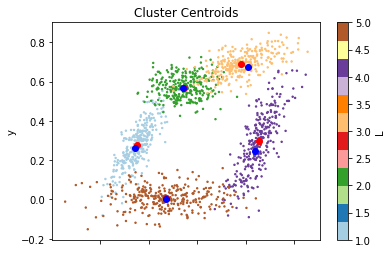

In [8]:
# Plot the data again, using the cluster centers 
df.plot.scatter(x='x', y='y',c='L',colormap=cmapstr, s=ptsize, title='Cluster Centroids')

# plot GMM centroids in red
for centroid in gmm_estimator.means_:
    plt.plot(centroid[0], centroid[1], 'ro')

# plot Kmeans centroids in blue
for centroid in kmeans_estimator.cluster_centers_:
    plt.plot(centroid[0], centroid[1], 'bo')

plt.show()

## Questions
1.  The ```KMeans``` method allows us to indicate how the initial centroids are chosen:
  * ```init='k-means++'``` (this is the default behaviour)
  * ```init='random'``` (you have to ask for this explicitly)
  
  Using the random initialization, re-run the notebook, and explain the differences that you see.  When you're done, return to the default behaviour for the next part.

2. The ```GMM``` method allows us to indicate how the initial centroids are chosen:
  * ```init_params='kmeans'``` (this is the default behaviour)
  * ```init_params='random'``` (you have to ask for this explicitly)
  
  Using the random initialization, re-run the notebook, and explain the differences that you see.

## Answers
1.  Switching from default behaviour ```init='kmeans++'``` to ```init='random'``` seems to have very little effect.  This is of course, dependent on the data set.  With other datasets, there could be a difference.  

2. Switching from ```init_params='kmeans'```  to ```init_params='random'``` has a big effect.  
  * With ```init_params='kmeans'```, the centroids seem to match the actual clusters that we know are in the dataset, and are fairly close to the kmeans centroids.  
  * With ```init_params='random'```, the centroids seem to find their home in the middle of all the clusters.  I ran the notebook a number of times, but I never saw the random initialization locate the clusters anywhere but the middle.
  * This behaviour is also dependent on the dataset.  
    * I suspect that what is happening is that the initial covariances are randomly a lot larger than the covariance of the dataset as a whole, and so never shrinks less than that.  Another way to think about it is in terms of scale.  If we scaled the sample points by a factor of $10^{-5}$, the data would look like a single cluster if we displayed the data to the same scale as in the plot above.  At that scale, we'd only see one cluster, and we'd expect a clustering algorithm to fit multiple centroids at the center of it.  
    * Another thing that could be going on is that *responsibilities* are assigned randomly, and all the classes have the same number of points.  So the centroids would get roughly equal numbers of points from all clusters.  The E-step wouldn't be able to move the responsibilities much, because every centroid is equally far from all the points.
    * Without a clearer picture about what the random initial starting point is actually doing, it's not possible to do more than speculate.

### Grading
1. For full marks, the comment should note that there is no obvious effect.  No explanation is needed.
2. For full marks, the comment should note that using random seems to put the centroids at the same location in the middle of the data.  There weas no requirement to explain why it happens.


## Grading: 12 marks
* Step 3. 3 marks.  Give full marks here unless the required options are missing.
     1. The number of clusters is required.  There's no reason for it to be some value different from 5 or ```n_classes```.
     2. Later parts of the notebook require changing ```init``` so either value could appear here.  Also, the default value is useful, so the ```init``` might not be set explicitly.
     3. Other options might be chosen, but none are required.


* Step 4. 3 marks.  Give full marks here unless the required options are missing.
    1. The number of clusters is required.  There's no reason for it to be some value different from 5 or ```n_components```.
    2. Later parts of the notebook require changing ```init_params``` so either value could appear here.  Also, the default value is useful, so the ```init_params``` might not be set explicitly.
    3. Other options might be chosen, but none are required.


* Answer to question 1 above (3 marks).
    * For full marks, the comment should note that there is no obvious effect.  No explanation is needed.


* Answer to question 2 above (3 marks).
    * For full marks, the comment should note that using random seems to put the centroids at the same location in the middle of the data.  There was no requirement to explain why it happens.